In [1]:
!unzip layanalysiz2.zip

Archive:  layanalysiz2.zip
   creating: layanalysiz/
   creating: layanalysiz/images/
  inflating: layanalysiz/images/utp-0110-014r.jpg  
  inflating: layanalysiz/images/utp-0110-014v.jpg  
  inflating: layanalysiz/images/utp-0110-015v.jpg  
  inflating: layanalysiz/images/utp-0110-016r.jpg  
  inflating: layanalysiz/images/utp-0110-016v.jpg  
  inflating: layanalysiz/images/utp-0110-017v.jpg  
  inflating: layanalysiz/images/utp-0110-018r.jpg  
  inflating: layanalysiz/images/utp-0110-018v.jpg  
  inflating: layanalysiz/images/utp-0110-019v.jpg  
  inflating: layanalysiz/images/utp-0110-021r.jpg  
  inflating: layanalysiz/images/utp-0110-021v.jpg  
  inflating: layanalysiz/images/utp-0110-022r.jpg  
  inflating: layanalysiz/images/utp-0110-022v.jpg  
  inflating: layanalysiz/images/utp-0110-023r.jpg  
  inflating: layanalysiz/images/utp-0110-023v.jpg  
  inflating: layanalysiz/images/utp-0110-024r.jpg  
  inflating: layanalysiz/images/utp-0110-025v.jpg  
  inflating: layanalysiz/image

In [ ]:
from PIL import Image

# Open the image file
image_path = "/content/rgb_masks/rgb_mask_0.png"  # Change this to your image file path
img = Image.open(image_path)

# Convert the image to RGB mode (if it's not already in RGB)
rgb_img = img.convert("RGB")

# Get the pixel data as a list of tuples (R, G, B)
pixel_data = list(rgb_img.getdata())

# Get unique pixel values (colors)
unique_pixel_values = set(pixel_data)

print("Unique Pixel Values (Colors):")
for color in unique_pixel_values:
    print(color)

Unique Pixel Values (Colors):
(255, 255, 0)
(0, 255, 255)
(0, 0, 0)
(0, 255, 0)
(255, 0, 0)
(0, 0, 255)
(255, 0, 255)


In [ ]:
import cv2
import numpy as np
import os
import glob

# Define the input and output folder paths
input_folder_path = '/content/rgb_masks/'
output_folder_path = '/content/rgb_masks_reduced/'

# Get a list of all image files in the input folder
image_files = glob.glob(os.path.join(input_folder_path, '*.png'))  # Change extension if needed

# Process each image in the input folder
for image_file in image_files:
    # Load the image
    image = cv2.imread(image_file)

    # Convert BGR image to RGB (if needed)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define the exact RGB values for Green and Cyan
    green_rgb = np.array([0, 255, 0])
    cyan_rgb = np.array([0, 255, 255])
    magenta_rgb = np.array([255, 0, 255])

    # Create masks for green and cyan pixels
    mask_green = np.all(image_rgb == green_rgb, axis=-1)
    mask_cyan = np.all(image_rgb == cyan_rgb, axis=-1)
    mask_magenta = np.all(image_rgb == magenta_rgb, axis=-1)

    # Convert green pixels to yellow
    image_rgb[mask_green] = [255, 255, 0]  # Yellow color in RGB format

    # Convert cyan pixels to yellow
    image_rgb[mask_cyan] = [255, 255, 0]  # Magenta color in RGB format

    # Convert magenta pixels to yellow
    image_rgb[mask_magenta] = [255, 255, 0]  # Yellow color in RGB format


    # Convert RGB image back to BGR (if needed)
    result = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Save the result to the output folder
    result_file = os.path.join(output_folder_path, os.path.basename(image_file))
    cv2.imwrite(result_file, result)
    print(f'Processed: {image_file} -> {result_file}')

print('All images processed and saved to the output folder.')


Processed: /content/rgb_masks/rgb_mask_99.png -> /content/rgb_masks_reduced/rgb_mask_99.png
Processed: /content/rgb_masks/rgb_mask_15.png -> /content/rgb_masks_reduced/rgb_mask_15.png
Processed: /content/rgb_masks/rgb_mask_66.png -> /content/rgb_masks_reduced/rgb_mask_66.png
Processed: /content/rgb_masks/rgb_mask_23.png -> /content/rgb_masks_reduced/rgb_mask_23.png
Processed: /content/rgb_masks/rgb_mask_24.png -> /content/rgb_masks_reduced/rgb_mask_24.png
Processed: /content/rgb_masks/rgb_mask_60.png -> /content/rgb_masks_reduced/rgb_mask_60.png
Processed: /content/rgb_masks/rgb_mask_56.png -> /content/rgb_masks_reduced/rgb_mask_56.png
Processed: /content/rgb_masks/rgb_mask_42.png -> /content/rgb_masks_reduced/rgb_mask_42.png
Processed: /content/rgb_masks/rgb_mask_59.png -> /content/rgb_masks_reduced/rgb_mask_59.png
Processed: /content/rgb_masks/rgb_mask_1.png -> /content/rgb_masks_reduced/rgb_mask_1.png
Processed: /content/rgb_masks/rgb_mask_95.png -> /content/rgb_masks_reduced/rgb_ma

In [2]:
import cv2
import numpy as np
import os
import glob

# Define the input and output folder paths
input_folder_path = '/content/layanalysiz/masks_png'
output_folder_path = '/content/layanalysiz/masks_without_yellow'

# Get a list of all image files in the input folder
image_files = sorted(glob.glob(os.path.join(input_folder_path, '*.png')))  # Change extension if needed

# Process each image in the input folder
for image_file in image_files:
    # Load the image
    image_rgb = cv2.imread(image_file)

    # Define the yellow color in RGB format
    yellow_rgb = np.array([0, 255, 255])

    # Create a mask for yellow pixels
    mask_yellow = np.all(image_rgb == yellow_rgb, axis=-1)

    # Convert yellow pixels to black
    image_rgb[mask_yellow] = [0, 0, 0]  # Black color in RGB format

    # Save the result to the output folder
    result_file = os.path.join(output_folder_path, os.path.basename(image_file))
    cv2.imwrite(result_file, image_rgb)
    print(f'Processed: {image_file} -> {result_file}')

print('All images processed and saved to the output folder.')


Processed: /content/layanalysiz/masks_png/utp-0110-014r.png -> /content/layanalysiz/masks_without_yellow/utp-0110-014r.png
Processed: /content/layanalysiz/masks_png/utp-0110-014v.png -> /content/layanalysiz/masks_without_yellow/utp-0110-014v.png
Processed: /content/layanalysiz/masks_png/utp-0110-015v.png -> /content/layanalysiz/masks_without_yellow/utp-0110-015v.png
Processed: /content/layanalysiz/masks_png/utp-0110-016r.png -> /content/layanalysiz/masks_without_yellow/utp-0110-016r.png
Processed: /content/layanalysiz/masks_png/utp-0110-016v.png -> /content/layanalysiz/masks_without_yellow/utp-0110-016v.png
Processed: /content/layanalysiz/masks_png/utp-0110-017v.png -> /content/layanalysiz/masks_without_yellow/utp-0110-017v.png
Processed: /content/layanalysiz/masks_png/utp-0110-018r.png -> /content/layanalysiz/masks_without_yellow/utp-0110-018r.png
Processed: /content/layanalysiz/masks_png/utp-0110-018v.png -> /content/layanalysiz/masks_without_yellow/utp-0110-018v.png
Processed: /cont

In [31]:
import cv2
import numpy as np
import os
import glob

# Define the input and output folder paths
input_folder_path = '/content/layanalysiz/masks_without_yellow'
output_folder_path = '/content/layanalysiz/masks_combined_inline'

# Get a list of all image files in the input folder
image_files = sorted(glob.glob(os.path.join(input_folder_path, '*.png')))  # Change extension if needed

# Process each image in the input folder
for image_file in image_files:
    # Load the image
    image_rgb = cv2.imread(image_file)

    # Define the yellow color in RGB format
    cyan_rgb = np.array([255, 255, 0])
    magenta_rgb = np.array([255,0,255])

    # Create a mask for yellow pixels
    mask_cyan = np.all(image_rgb == cyan_rgb, axis=-1)
    mask_magenta = np.all(image_rgb == magenta_rgb, axis=-1)

    # Convert yellow pixels to black
    image_rgb[mask_cyan] = [0, 255, 0]  # Black color in RGB format
    image_rgb[mask_magenta] = [0, 255, 0]  # Black color in RGB format

    # Save the result to the output folder
    result_file = os.path.join(output_folder_path, os.path.basename(image_file))
    cv2.imwrite(result_file, image_rgb)
    print(f'Processed: {image_file} -> {result_file}')

print('All images processed and saved to the output folder.')


Processed: /content/layanalysiz/masks_without_yellow/utp-0110-014r.png -> /content/layanalysiz/masks_combined_inline/utp-0110-014r.png
Processed: /content/layanalysiz/masks_without_yellow/utp-0110-014v.png -> /content/layanalysiz/masks_combined_inline/utp-0110-014v.png
Processed: /content/layanalysiz/masks_without_yellow/utp-0110-015v.png -> /content/layanalysiz/masks_combined_inline/utp-0110-015v.png
Processed: /content/layanalysiz/masks_without_yellow/utp-0110-016r.png -> /content/layanalysiz/masks_combined_inline/utp-0110-016r.png
Processed: /content/layanalysiz/masks_without_yellow/utp-0110-016v.png -> /content/layanalysiz/masks_combined_inline/utp-0110-016v.png
Processed: /content/layanalysiz/masks_without_yellow/utp-0110-017v.png -> /content/layanalysiz/masks_combined_inline/utp-0110-017v.png
Processed: /content/layanalysiz/masks_without_yellow/utp-0110-018r.png -> /content/layanalysiz/masks_combined_inline/utp-0110-018r.png
Processed: /content/layanalysiz/masks_without_yellow/ut

In [ ]:
import cv2
import numpy as np
import os

def apply_otsu_binarization(image_path, output_folder):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Otsu's thresholding
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save the binary image
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, f"binary_{filename}")
    cv2.imwrite(output_path, binary_image)

def process_image_folder(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(input_folder, filename)
            apply_otsu_binarization(image_path, output_folder)

# Specify input and output folders
input_folder = "/content/layout_analysis/images"
output_folder = "/content/layout_analysis/images_otsu"

# Process the image folder
process_image_folder(input_folder, output_folder)


In [ ]:
import shutil

# Specify the folder path to be deleted
folder_path = '/content/rgb_masks_reduced'

# Use shutil.rmtree() to delete the folder and its contents recursively
shutil.rmtree(folder_path)

print(f'Folder {folder_path} and its contents have been deleted.')


Folder /content/rgb_masks_reduced and its contents have been deleted.


In [32]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda



def multi_unet_model(n_classes=6, IMG_HEIGHT=960, IMG_WIDTH=640, IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs


    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(n_classes, (1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model


In [98]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt


SIZE_X = 256
SIZE_Y = 256
n_classes=6 #Number of classes for segmentation

train_images = []

for directory_path in glob.glob("/content/layanalysiz/images/"):
    for img_path in sorted(glob.glob(os.path.join(directory_path, "*.jpg"))):
        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images.append(img_rgb)

train_images = np.array(train_images)

train_masks = []
for directory_path in glob.glob("/content/layanalysiz/masks_without_yellow/"):
    for mask_path in sorted(glob.glob(os.path.join(directory_path, "*.png"))):
        mask = cv2.imread(mask_path, 0)
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)

train_masks = np.array(train_masks)

In [99]:
train_images.shape

(100, 960, 640, 3)

array([[[202, 191, 171],
        [199, 188, 168],
        [203, 192, 170],
        ...,
        [200, 184, 158],
        [193, 176, 150],
        [186, 169, 143]],

       [[198, 187, 167],
        [195, 184, 164],
        [201, 190, 168],
        ...,
        [203, 187, 161],
        [201, 184, 158],
        [189, 172, 146]],

       [[203, 192, 172],
        [198, 187, 167],
        [200, 189, 167],
        ...,
        [202, 186, 160],
        [206, 188, 164],
        [199, 181, 157]],

       ...,

       [[181, 173, 152],
        [191, 183, 162],
        [181, 173, 152],
        ...,
        [197, 177, 140],
        [154, 139, 108],
        [ 41,  27,   0]],

       [[188, 180, 161],
        [202, 194, 175],
        [165, 158, 139],
        ...,
        [183, 165, 129],
        [137, 123,  96],
        [ 32,  21,   0]],

       [[208, 200, 181],
        [183, 175, 156],
        [162, 155, 137],
        ...,
        [144, 126,  90],
        [ 74,  62,  36],
        [ 26,  18,   0]]], dtype=uint8)
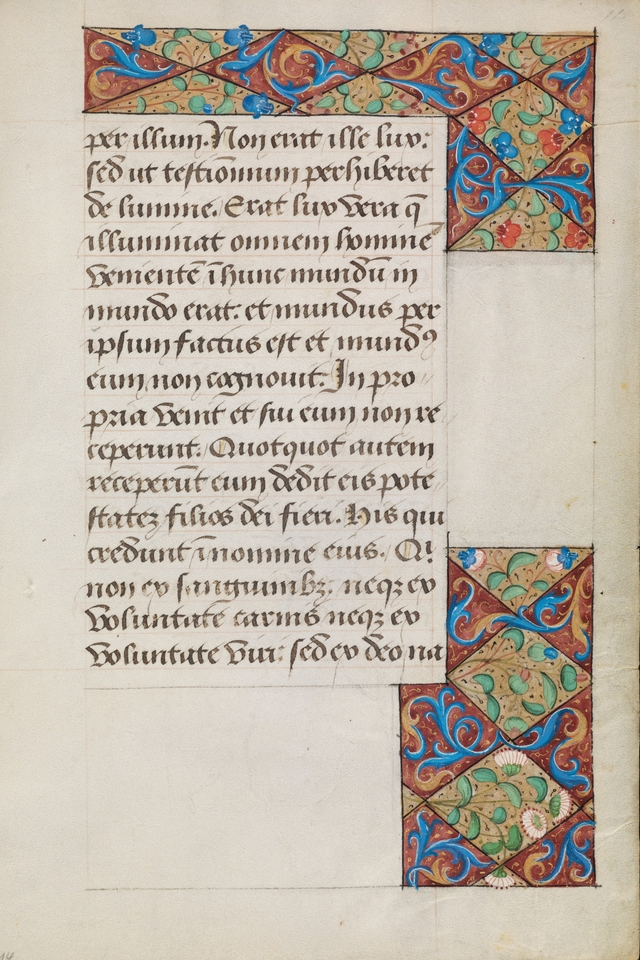

In [ ]:
train_images[0]

In [79]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt


SIZE_X = 256
SIZE_Y = 256
n_classes=4 #Number of classes for segmentation

train_images_2 = []

for directory_path in glob.glob("/content/layanalysiz/images/"):
    for img_path in sorted(glob.glob(os.path.join(directory_path, "*.jpg"))):
        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images_2.append(img_rgb)

train_images_2 = np.array(train_images_2)

train_masks_2 = []
for directory_path in glob.glob("/content/layanalysiz/masks_combined_inline/"):
    for mask_path in sorted(glob.glob(os.path.join(directory_path, "*.png"))):
        mask = cv2.imread(mask_path, 0)
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks_2.append(mask)

train_masks_2 = np.array(train_masks_2)

In [ ]:
train_masks_reshaped.shape

(61440000, 1)

In [100]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)

train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4, 5])

In [80]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks_2.shape
train_masks_reshaped_2 = train_masks_2.reshape(-1,1)

train_masks_reshaped_encoded_2 = labelencoder.fit_transform(train_masks_reshaped_2)
train_masks_encoded_original_shape_2 = train_masks_reshaped_encoded_2.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape_2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3])

In [60]:
train_images[0]

array([[[0.02945211],
        [0.02894779],
        [0.02955064],
        ...,
        [0.03361894],
        [0.03261556],
        [0.03609646]],

       [[0.02883853],
        [0.02833514],
        [0.02924442],
        ...,
        [0.03416118],
        [0.03408142],
        [0.03672973]],

       [[0.02960551],
        [0.02879463],
        [0.0290913 ],
        ...,
        [0.03398043],
        [0.03499759],
        [0.03884063]],

       ...,

       [[0.02653758],
        [0.02802881],
        [0.0264884 ],
        ...,
        [0.03235371],
        [0.02565269],
        [0.00591053]],

       [[0.02761135],
        [0.02971361],
        [0.02419172],
        ...,
        [0.030004  ],
        [0.02272095],
        [0.00464399]],

       [[0.03067928],
        [0.02680351],
        [0.02373238],
        ...,
        [0.02295487],
        [0.01154371],
        [0.00379963]]])

In [101]:

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 1/9, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))

from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

val_masks_cat = to_categorical(y_val, num_classes=n_classes)
y_val_cat = val_masks_cat.reshape((y_val.shape[0], y_val.shape[1], y_val.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

Class values in the dataset are ...  [0 1 2 3 4 5]


In [37]:
train_images_2.shape

(100, 960, 640, 3)

In [81]:
train_masks_input_2 = np.expand_dims(train_masks_encoded_original_shape_2, axis=3)

from sklearn.model_selection import train_test_split
X_train_val_2, X_test_2, y_train_val_2, y_test_2 = train_test_split(train_images_2, train_masks_input_2, test_size = 0.10, random_state = 0)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_val_2, y_train_val_2, test_size = 1/9, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train_2))

from keras.utils import to_categorical
train_masks_cat_2 = to_categorical(y_train_2, num_classes=n_classes)
y_train_cat_2 = train_masks_cat_2.reshape((y_train_2.shape[0], y_train_2.shape[1], y_train_2.shape[2], n_classes))

val_masks_cat_2 = to_categorical(y_val_2, num_classes=n_classes)
y_val_cat_2 = val_masks_cat_2.reshape((y_val_2.shape[0], y_val_2.shape[1], y_val_2.shape[2], n_classes))

test_masks_cat_2 = to_categorical(y_test_2, num_classes=n_classes)
y_test_cat_2 = test_masks_cat_2.reshape((y_test_2.shape[0], y_test_2.shape[1], y_test_2.shape[2], n_classes))

Class values in the dataset are ...  [0 1 2 3]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes = np.unique(train_masks_reshaped_encoded), y = train_masks_reshaped_encoded)

print("Class weights are...:", class_weights)

Class weights are...: [0.5291277  2.10958403 1.19007064 1.25662289]


In [102]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [82]:
IMG_HEIGHT = X_train_2.shape[1]
IMG_WIDTH  = X_train_2.shape[2]
IMG_CHANNELS = X_train_2.shape[3]

In [83]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 960, 640, 3)]        0         []                            
                                                                                                  
 conv2d_95 (Conv2D)          (None, 960, 640, 16)         448       ['input_6[0][0]']             
                                                                                                  
 dropout_27 (Dropout)        (None, 960, 640, 16)         0         ['conv2d_95[0][0]']           
                                                                                                  
 conv2d_96 (Conv2D)          (None, 960, 640, 16)         2320      ['dropout_27[0][0]']          
                                                                                            

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
#model.load_weights('/content/test4.hdf5')
history = model.fit(X_train, y_train_cat,
                    batch_size = 8,
                    verbose=1,
                    epochs=30,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb8e30.hdf5')

Epoch 1/30
12/12 [==============================] - 92s 7s/step - loss: 1.7639 - accuracy: 0.2019 - val_loss: 1.6948 - val_accuracy: 0.1962
Epoch 2/30
12/12 [==============================] - 85s 7s/step - loss: 1.5196 - accuracy: 0.3235 - val_loss: 1.2981 - val_accuracy: 0.6571
Epoch 3/30
12/12 [==============================] - 86s 7s/step - loss: 1.1076 - accuracy: 0.6185 - val_loss: 1.0112 - val_accuracy: 0.6574
Epoch 4/30
12/12 [==============================] - 85s 7s/step - loss: 1.0036 - accuracy: 0.6354 - val_loss: 0.9359 - val_accuracy: 0.6584
Epoch 5/30
12/12 [==============================] - 85s 7s/step - loss: 0.8928 - accuracy: 0.6390 - val_loss: 0.6995 - val_accuracy: 0.6586
Epoch 6/30
12/12 [==============================] - 86s 7s/step - loss: 0.6790 - accuracy: 0.7138 - val_loss: 0.5630 - val_accuracy: 0.8323
Epoch 7/30
12/12 [==============================] - 85s 7s/step - loss: 0.5370 - accuracy: 0.8168 - val_loss: 0.4000 - val_accuracy: 0.8310
Epoch 8/30
12/12 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step - loss: 0.0333 - accuracy: 0.9883
Accuracy is =  98.8340675830841 %


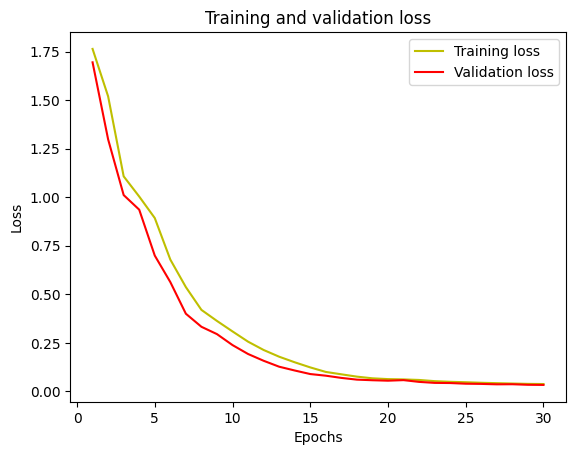

KeyError: 'acc'

In [ ]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")


1/1 [==============================] - 1s 1s/step
Mean IoU = 0.912962
[[4.015256e+06 2.211500e+04 6.533000e+03 1.154000e+03 2.398000e+03
  1.159000e+03]
 [1.885500e+04 7.154590e+05 1.000000e+00 4.000000e+01 1.030000e+02
  1.700000e+01]
 [6.815000e+03 0.000000e+00 1.198717e+06 0.000000e+00 0.000000e+00
  7.300000e+01]
 [2.154000e+03 2.110000e+02 4.740000e+02 5.439100e+04 6.380000e+02
  2.854000e+03]
 [2.598000e+03 1.970000e+02 0.000000e+00 0.000000e+00 6.378300e+04
  0.000000e+00]
 [1.239000e+03 4.700000e+01 1.751000e+03 1.940000e+02 1.500000e+01
  2.475900e+04]]
IoU for class 1 is: 0.9840648174285889
IoU for class 2 is: 0.9450680017471313
IoU for class 3 is: 0.9871150851249695
IoU for class 4 is: 0.8757205009460449
IoU for class 5 is: 0.9146876335144043
IoU for class 6 is: 0.7711162567138672


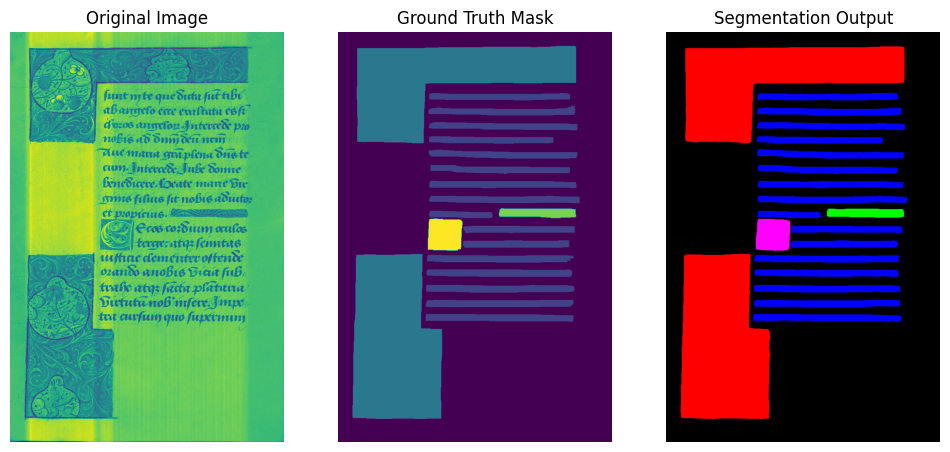

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_index = 0

original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]  # Assuming y_pred is a numpy array of predicted masks (RGB)

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color


# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()


In [ ]:
history2 = model.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=60,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e60.hdf5')

Epoch 1/60
18/18 [==============================] - 94s 5s/step - loss: 1.8093 - accuracy: 0.5947 - val_loss: 1.6401 - val_accuracy: 0.6590
Epoch 2/60
18/18 [==============================] - 89s 5s/step - loss: 1.3557 - accuracy: 0.6329 - val_loss: 1.2358 - val_accuracy: 0.6590
Epoch 3/60
18/18 [==============================] - 89s 5s/step - loss: 1.0285 - accuracy: 0.6389 - val_loss: 0.9278 - val_accuracy: 0.6590
Epoch 4/60
18/18 [==============================] - 89s 5s/step - loss: 0.7974 - accuracy: 0.6406 - val_loss: 0.6543 - val_accuracy: 0.6590
Epoch 5/60
18/18 [==============================] - 89s 5s/step - loss: 0.6548 - accuracy: 0.6541 - val_loss: 0.5859 - val_accuracy: 0.7624
Epoch 6/60
18/18 [==============================] - 89s 5s/step - loss: 0.5728 - accuracy: 0.7684 - val_loss: 0.4376 - val_accuracy: 0.8415
Epoch 7/60
18/18 [==============================] - 90s 5s/step - loss: 0.4044 - accuracy: 0.8362 - val_loss: 0.3213 - val_accuracy: 0.8478
Epoch 8/60
18/18 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step - loss: 0.0241 - accuracy: 0.9908
Accuracy is =  99.0847647190094 %


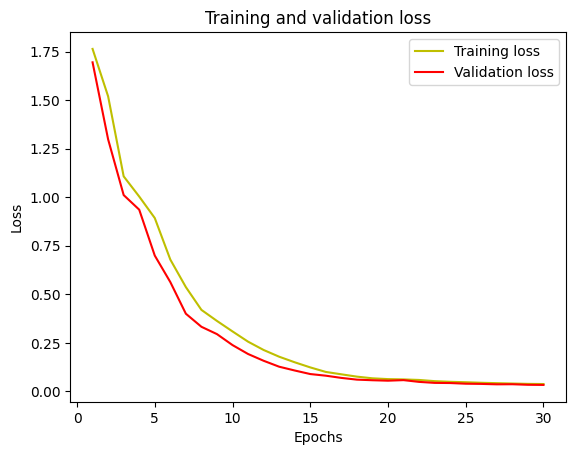

In [ ]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")


1/1 [==============================] - 2s 2s/step
Mean IoU = 0.9462519
[[4.026057e+06 1.247300e+04 4.324000e+03 2.080000e+03 3.481000e+03
  2.000000e+02]
 [2.057600e+04 7.138330e+05 0.000000e+00 8.000000e+00 5.500000e+01
  3.000000e+00]
 [6.439000e+03 0.000000e+00 1.199134e+06 3.200000e+01 0.000000e+00
  0.000000e+00]
 [1.922000e+03 8.200000e+01 2.110000e+02 5.845500e+04 0.000000e+00
  5.200000e+01]
 [1.391000e+03 0.000000e+00 0.000000e+00 0.000000e+00 6.518700e+04
  0.000000e+00]
 [1.375000e+03 0.000000e+00 1.343000e+03 1.840000e+02 1.000000e+00
  2.510200e+04]]
IoU for class 1 is: 0.9867017865180969
IoU for class 2 is: 0.9555613398551941
IoU for class 3 is: 0.9898067116737366
IoU for class 4 is: 0.9274743795394897
IoU for class 5 is: 0.9297154545783997
IoU for class 6 is: 0.8882519602775574


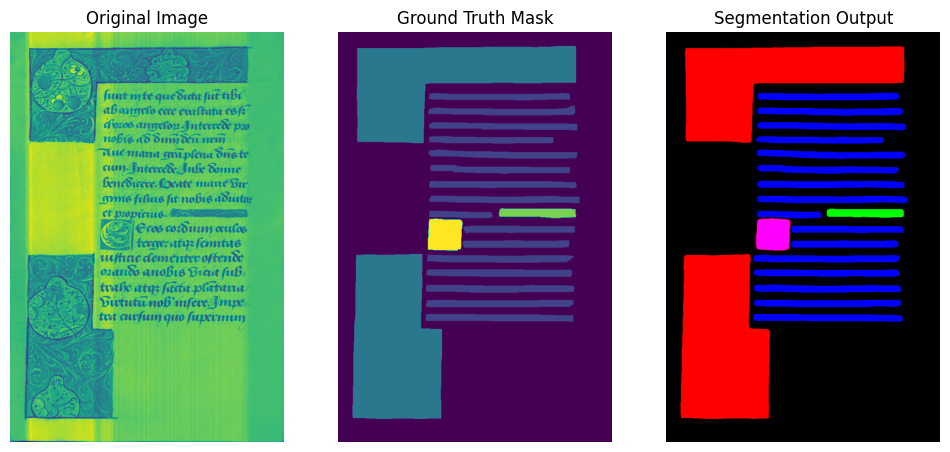

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example one-hot encoded output from U-Net model (Replace this with actual model output)
output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

image_index = 0

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]  # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()


In [ ]:
history = model.fit(X_train, y_train_cat,
                    batch_size = 8,
                    verbose=1,
                    epochs=30,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb8e30wonormalization.hdf5')

Epoch 1/30
11/11 [==============================] - 82s 7s/step - loss: 1.7800 - accuracy: 0.2081 - val_loss: 1.7146 - val_accuracy: 0.1962
Epoch 2/30
11/11 [==============================] - 78s 7s/step - loss: 1.6307 - accuracy: 0.2598 - val_loss: 1.3580 - val_accuracy: 0.3206
Epoch 3/30
11/11 [==============================] - 79s 7s/step - loss: 1.3126 - accuracy: 0.4201 - val_loss: 1.1875 - val_accuracy: 0.6067
Epoch 4/30
11/11 [==============================] - 77s 7s/step - loss: 1.1212 - accuracy: 0.6302 - val_loss: 0.9816 - val_accuracy: 0.6590
Epoch 5/30
11/11 [==============================] - 78s 7s/step - loss: 0.9731 - accuracy: 0.6376 - val_loss: 0.8613 - val_accuracy: 0.6590
Epoch 6/30
11/11 [==============================] - 78s 7s/step - loss: 0.8276 - accuracy: 0.6397 - val_loss: 0.6685 - val_accuracy: 0.6590
Epoch 7/30
11/11 [==============================] - 77s 7s/step - loss: 0.6878 - accuracy: 0.6414 - val_loss: 0.6540 - val_accuracy: 0.6591
Epoch 8/30
11/11 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step - loss: 0.0464 - accuracy: 0.9823
Accuracy is =  98.23170304298401 %


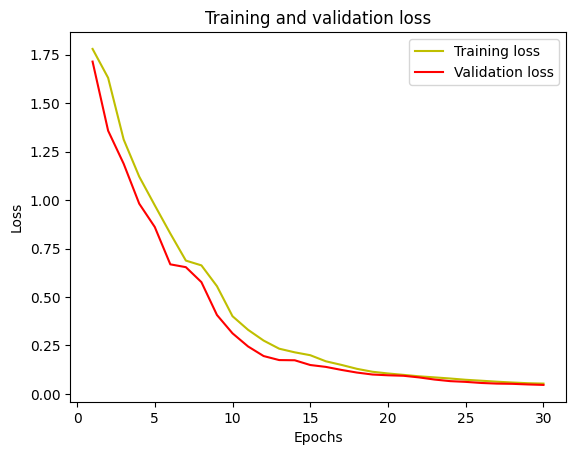

In [ ]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_val)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")


1/1 [==============================] - 1s 1s/step
Mean IoU = 0.005710488
[[4.636000e+03 1.940000e+02 6.851000e+03 1.229750e+05 1.980840e+05
  3.715875e+06]
 [8.110000e+02 5.600000e+01 2.110000e+03 4.659700e+04 6.832400e+04
  6.165770e+05]
 [9.500000e+02 1.280000e+02 7.049000e+03 6.793400e+04 1.168620e+05
  1.012682e+06]
 [1.060000e+02 4.000000e+00 2.140000e+02 3.909000e+03 5.942000e+03
  5.054700e+04]
 [6.800000e+01 2.000000e+00 1.460000e+02 3.321000e+03 4.669000e+03
  5.837200e+04]
 [6.600000e+01 2.000000e+00 5.800000e+01 1.993000e+03 2.946000e+03
  2.294000e+04]]
IoU for class 1 is: 0.0011445173295214772
IoU for class 2 is: 7.621069380547851e-05
IoU for class 3 is: 0.005801722407341003
IoU for class 4 is: 0.012877954170107841
IoU for class 5 is: 0.010177967138588428
IoU for class 6 is: 0.004184559918940067


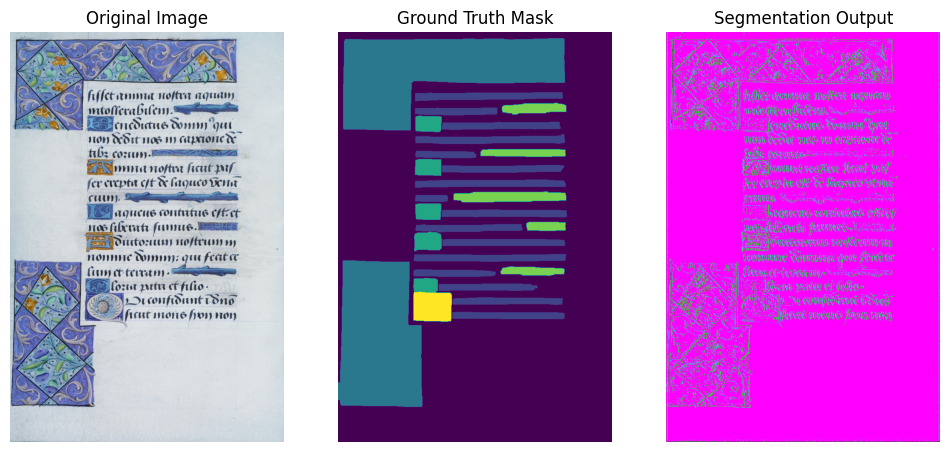

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 1

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_val[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_val[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()


In [ ]:
history = model.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=30,
                    validation_data=(X_test, y_test_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e30wrgbinput.hdf5')

Epoch 1/30
16/16 [==============================] - 86s 5s/step - loss: 14.6915 - accuracy: 0.3532 - val_loss: 1.1474 - val_accuracy: 0.6883
Epoch 2/30
16/16 [==============================] - 81s 5s/step - loss: 1.9052 - accuracy: 0.5488 - val_loss: 0.8661 - val_accuracy: 0.7067
Epoch 3/30
16/16 [==============================] - 81s 5s/step - loss: 1.1974 - accuracy: 0.6462 - val_loss: 0.7154 - val_accuracy: 0.7393
Epoch 4/30
16/16 [==============================] - 81s 5s/step - loss: 0.9137 - accuracy: 0.6891 - val_loss: 0.6333 - val_accuracy: 0.7581
Epoch 5/30
16/16 [==============================] - 81s 5s/step - loss: 0.7638 - accuracy: 0.7187 - val_loss: 0.5647 - val_accuracy: 0.7728
Epoch 6/30
16/16 [==============================] - 80s 5s/step - loss: 0.6739 - accuracy: 0.7396 - val_loss: 0.5143 - val_accuracy: 0.7799
Epoch 7/30
16/16 [==============================] - 81s 5s/step - loss: 0.6169 - accuracy: 0.7543 - val_loss: 0.4812 - val_accuracy: 0.7896
Epoch 8/30
16/16 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step - loss: 0.1078 - accuracy: 0.9612
Accuracy is =  96.12389206886292 %


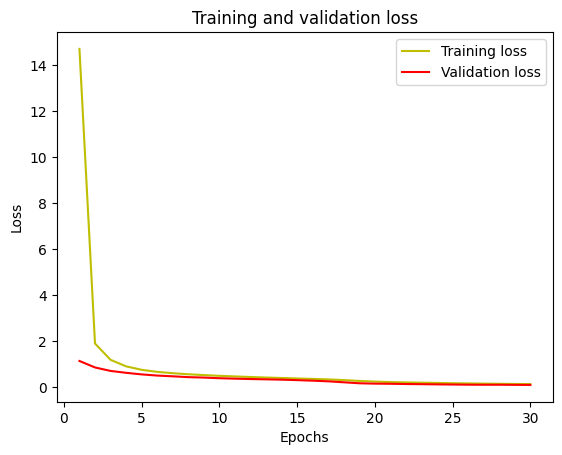

In [ ]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_val)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 1s 1s/step
Mean IoU = 0.2065519
[[3.109606e+06 3.867050e+05 5.474520e+05 3.480000e+02 1.058000e+03
  3.446000e+03]
 [3.851450e+05 2.367180e+05 1.100520e+05 2.070000e+02 5.580000e+02
  1.795000e+03]
 [4.183530e+05 4.277600e+04 7.427980e+05 1.040000e+02 3.830000e+02
  1.191000e+03]
 [2.898100e+04 1.774600e+04 1.290600e+04 2.900000e+01 2.870000e+02
  7.730000e+02]
 [4.394200e+04 1.552000e+04 7.107000e+03 2.000000e+00 5.000000e+00
  2.000000e+00]
 [1.347700e+04 1.166300e+04 1.861000e+03 1.700000e+01 3.100000e+02
  6.770000e+02]]
IoU for class 1 is: 0.629664421081543
IoU for class 2 is: 0.19581514596939087
IoU for class 3 is: 0.3940608501434326
IoU for class 4 is: 0.00047231270582415164
IoU for class 5 is: 7.228149479487911e-05
IoU for class 6 is: 0.019226400181651115


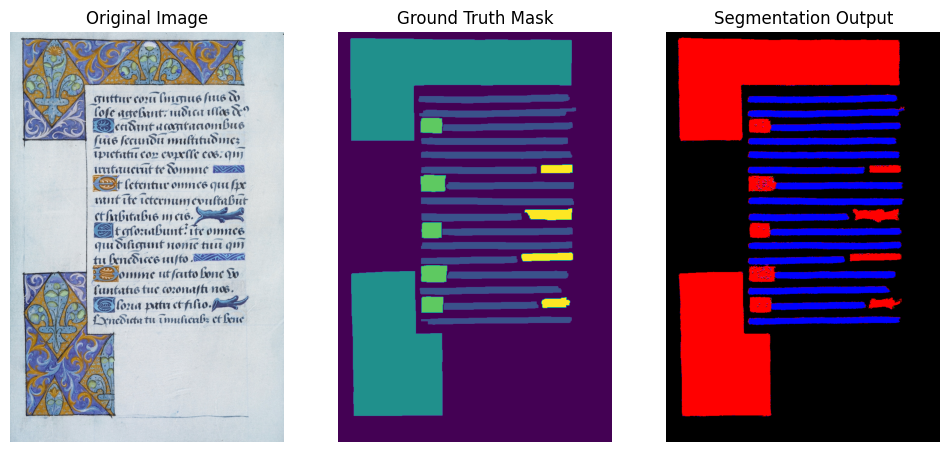

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 2

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_val[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_val[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [ ]:
history = model.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=40,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e40wrgbinput2.hdf5')
#normal rgbinput versiyonu aslında bgr input olarak verilmiş değiştir!

Epoch 1/40
16/16 [==============================] - 85s 5s/step - loss: 7.8153 - accuracy: 0.5401 - val_loss: 1.6491 - val_accuracy: 0.7171
Epoch 2/40
16/16 [==============================] - 82s 5s/step - loss: 1.9576 - accuracy: 0.5856 - val_loss: 0.9459 - val_accuracy: 0.7488
Epoch 3/40
16/16 [==============================] - 81s 5s/step - loss: 0.9566 - accuracy: 0.7120 - val_loss: 0.8486 - val_accuracy: 0.7714
Epoch 4/40
16/16 [==============================] - 80s 5s/step - loss: 0.7681 - accuracy: 0.7788 - val_loss: 0.7943 - val_accuracy: 0.7955
Epoch 5/40
16/16 [==============================] - 81s 5s/step - loss: 0.6895 - accuracy: 0.7990 - val_loss: 0.6613 - val_accuracy: 0.8261
Epoch 6/40
16/16 [==============================] - 82s 5s/step - loss: 0.6072 - accuracy: 0.8259 - val_loss: 0.5888 - val_accuracy: 0.8470
Epoch 7/40
16/16 [==============================] - 81s 5s/step - loss: 0.4861 - accuracy: 0.8683 - val_loss: 0.4510 - val_accuracy: 0.8869
Epoch 8/40
16/16 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step - loss: 0.1007 - accuracy: 0.9683
Accuracy is =  96.8252420425415 %


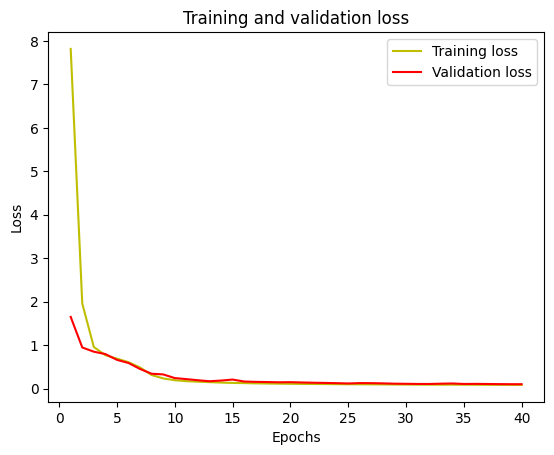

In [ ]:
_, acc = model.evaluate(X_val, y_val_cat)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 2s 2s/step
Mean IoU = 0.551487
[[4.027916e+06 1.228300e+04 1.431000e+03 1.240000e+02 6.839000e+03
  2.200000e+01]
 [3.064800e+04 7.036600e+05 1.000000e+01 4.000000e+00 1.530000e+02
  0.000000e+00]
 [1.847400e+04 1.340000e+02 1.183569e+06 2.290000e+02 3.187000e+03
  1.200000e+01]
 [2.368000e+03 5.900000e+01 3.160000e+02 7.100000e+01 5.790200e+04
  6.000000e+00]
 [2.991000e+03 2.600000e+01 5.000000e+01 2.100000e+01 6.349000e+04
  0.000000e+00]
 [5.395000e+03 1.400000e+01 6.130000e+02 7.400000e+01 2.190600e+04
  3.000000e+00]]
IoU for class 1 is: 0.9803881645202637
IoU for class 2 is: 0.9419925808906555
IoU for class 3 is: 0.9797554016113281
IoU for class 4 is: 0.0011606237385421991
IoU for class 5 is: 0.40551847219467163
IoU for class 6 is: 0.00010697093966882676


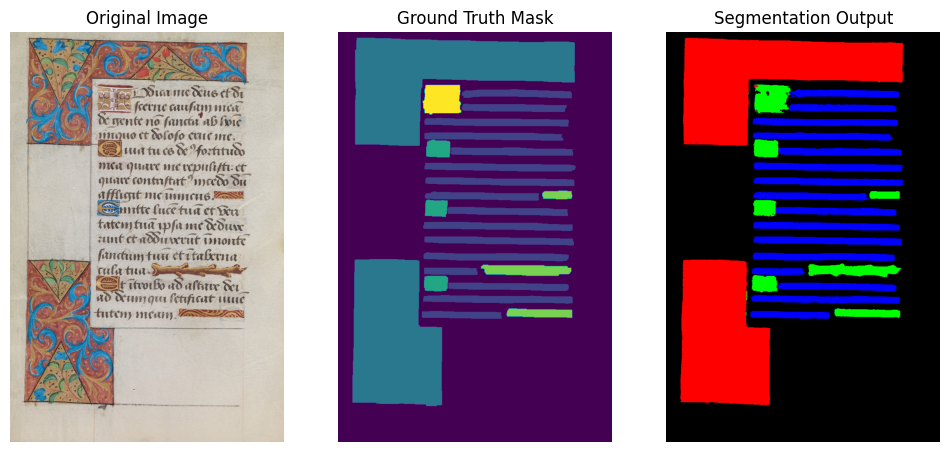

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 5

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [21]:
history2 = model.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=60,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e60grayscaleinputnormalized.hdf5')

Epoch 1/60
16/16 [==============================] - 27s 212ms/step - loss: 1.5220 - accuracy: 0.5825 - val_loss: 1.3906 - val_accuracy: 0.6458
Epoch 2/60
16/16 [==============================] - 2s 104ms/step - loss: 1.0287 - accuracy: 0.6402 - val_loss: 0.8553 - val_accuracy: 0.6458
Epoch 3/60
16/16 [==============================] - 2s 100ms/step - loss: 0.7484 - accuracy: 0.6411 - val_loss: 0.7313 - val_accuracy: 0.6463
Epoch 4/60
16/16 [==============================] - 2s 100ms/step - loss: 0.6528 - accuracy: 0.7264 - val_loss: 0.5595 - val_accuracy: 0.7956
Epoch 5/60
16/16 [==============================] - 2s 100ms/step - loss: 0.5004 - accuracy: 0.8314 - val_loss: 0.4784 - val_accuracy: 0.9238
Epoch 6/60
16/16 [==============================] - 2s 101ms/step - loss: 0.3552 - accuracy: 0.9091 - val_loss: 0.2597 - val_accuracy: 0.9374
Epoch 7/60
16/16 [==============================] - 2s 98ms/step - loss: 0.2334 - accuracy: 0.9350 - val_loss: 0.1858 - val_accuracy: 0.9467
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 4s 4s/step
Mean IoU = 0.92432636
[[4.009728e+06 1.279000e+04 1.726100e+04 2.685000e+03 3.951000e+03
  2.200000e+03]
 [2.799700e+04 7.058990e+05 0.000000e+00 2.890000e+02 4.800000e+01
  2.420000e+02]
 [6.055000e+03 0.000000e+00 1.199078e+06 2.200000e+01 0.000000e+00
  4.500000e+02]
 [1.316000e+03 4.700000e+01 2.000000e+01 5.752600e+04 2.200000e+01
  1.791000e+03]
 [1.972000e+03 0.000000e+00 0.000000e+00 0.000000e+00 6.460600e+04
  0.000000e+00]
 [3.160000e+02 0.000000e+00 8.100000e+02 0.000000e+00 0.000000e+00
  2.687900e+04]]
IoU for class 1 is: 0.9812682271003723
IoU for class 2 is: 0.9445840716362
IoU for class 3 is: 0.9798822402954102
IoU for class 4 is: 0.9028217792510986
IoU for class 5 is: 0.9151121377944946
IoU for class 6 is: 0.8222895264625549


1/1 [==============================] - 0s 128ms/step - loss: 0.0457 - accuracy: 0.9863
Accuracy is =  98.6280083656311 %


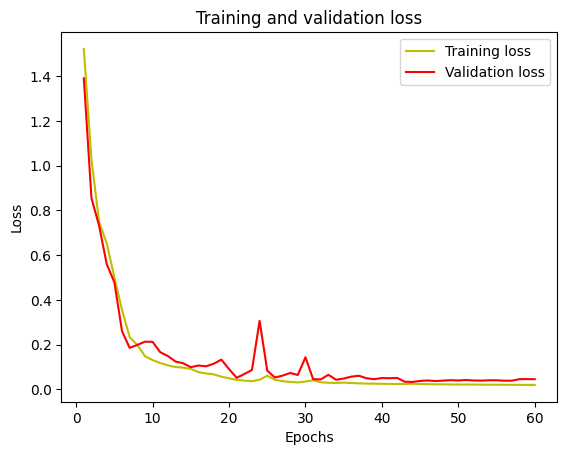

In [25]:
_, acc = model.evaluate(X_val, y_val_cat)
print("Accuracy is = ", (acc * 100.0), "%")


loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

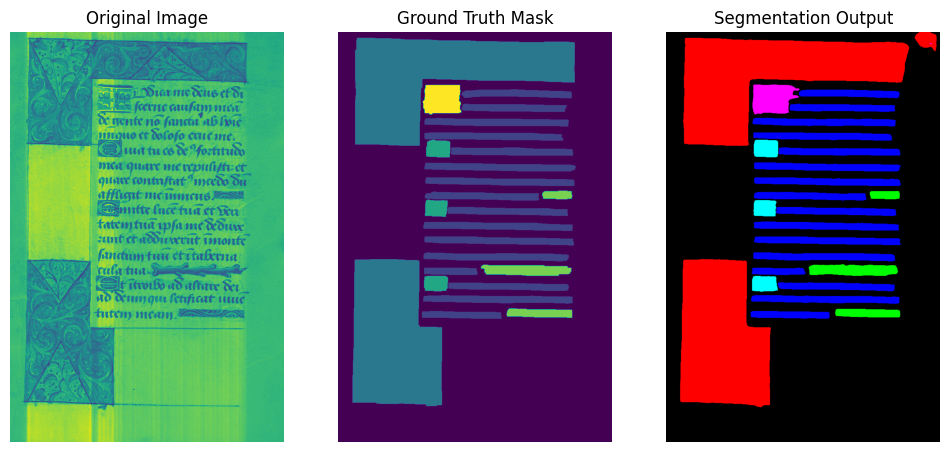

In [26]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 5

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [27]:
from google.colab import files
files.download('/content/testb5e60grayscaleinputnormalized.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
X_train_2.shape

(80, 960, 640, 3)

In [85]:
history2 = model.fit(X_train_2, y_train_cat_2,
                    batch_size = 5,
                    verbose=1,
                    epochs=60,
                    validation_data=(X_val_2, y_val_cat_2),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e60rgbinput4classes.hdf5')

Epoch 1/60
16/16 [==============================] - 8s 127ms/step - loss: 10.4008 - accuracy: 0.5973 - val_loss: 2.8839 - val_accuracy: 0.7113
Epoch 2/60
16/16 [==============================] - 1s 92ms/step - loss: 2.6123 - accuracy: 0.6497 - val_loss: 1.1775 - val_accuracy: 0.7214
Epoch 3/60
16/16 [==============================] - 1s 91ms/step - loss: 1.4637 - accuracy: 0.6469 - val_loss: 0.7613 - val_accuracy: 0.7422
Epoch 4/60
16/16 [==============================] - 1s 90ms/step - loss: 0.9758 - accuracy: 0.6797 - val_loss: 0.6410 - val_accuracy: 0.7971
Epoch 5/60
16/16 [==============================] - 1s 90ms/step - loss: 0.7002 - accuracy: 0.7684 - val_loss: 0.6231 - val_accuracy: 0.8128
Epoch 6/60
16/16 [==============================] - 1s 90ms/step - loss: 0.6102 - accuracy: 0.7930 - val_loss: 0.6038 - val_accuracy: 0.8143
Epoch 7/60
16/16 [==============================] - 1s 90ms/step - loss: 0.5811 - accuracy: 0.8002 - val_loss: 0.5981 - val_accuracy: 0.8181
Epoch 8/60


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 410ms/step - loss: 0.1198 - accuracy: 0.9566
Accuracy is =  95.66295742988586 %


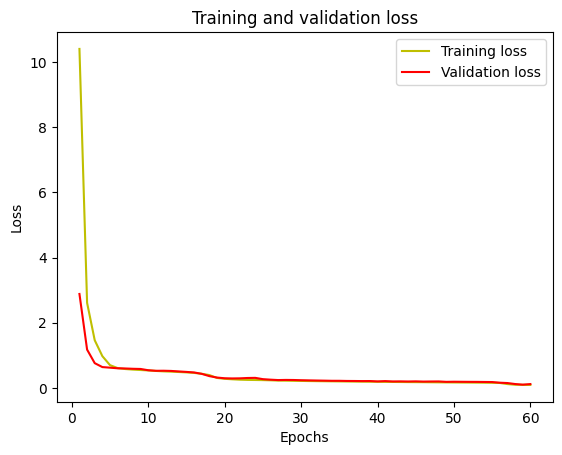

In [86]:
_, acc = model.evaluate(X_val_2, y_val_cat_2)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
y_pred=model.predict(X_test_2)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test_2[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 0s 264ms/step
Mean IoU = 0.6866499
[[4.025247e+06 2.152500e+04 1.810000e+03 3.300000e+01]
 [3.236700e+04 7.020590e+05 3.200000e+01 1.700000e+01]
 [1.141600e+04 2.019000e+03 1.192165e+06 5.000000e+00]
 [1.116200e+04 1.435290e+05 5.980000e+02 1.600000e+01]]
IoU for class 1 is: 0.9809158444404602
IoU for class 2 is: 0.7787261605262756
IoU for class 3 is: 0.9868547916412354
IoU for class 4 is: 0.00010298661072738469


In [88]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate

def unet_16_model(n_classes=6, IMG_HEIGHT=960, IMG_WIDTH=640, IMG_CHANNELS=1):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    # Contracting Path
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)

    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottom
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Expansive Path
    u6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(c9)

    outputs = Conv2D(n_classes, (1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model



In [56]:
y_test.shape

(10, 960, 640, 1)

In [93]:
def get_model():
    return unet_16_model(n_classes=6, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model2 = get_model()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 960, 640, 3)]        0         []                            
                                                                                                  
 conv2d_133 (Conv2D)         (None, 960, 640, 64)         1792      ['input_8[0][0]']             
                                                                                                  
 conv2d_134 (Conv2D)         (None, 960, 640, 64)         36928     ['conv2d_133[0][0]']          
                                                                                                  
 max_pooling2d_28 (MaxPooli  (None, 480, 320, 64)         0         ['conv2d_134[0][0]']          
 ng2D)                                                                                      

In [75]:
history2 = model2.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=60,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e60rgbinputunet16.hdf5')

Epoch 1/60
16/16 [==============================] - 37s 296ms/step - loss: 6.2232 - accuracy: 0.4906 - val_loss: 1.3641 - val_accuracy: 0.7761
Epoch 2/60
16/16 [==============================] - 4s 264ms/step - loss: 0.9741 - accuracy: 0.7446 - val_loss: 0.5977 - val_accuracy: 0.8297
Epoch 3/60
16/16 [==============================] - 4s 264ms/step - loss: 0.5008 - accuracy: 0.8573 - val_loss: 0.4308 - val_accuracy: 0.8713
Epoch 4/60
16/16 [==============================] - 4s 266ms/step - loss: 0.5199 - accuracy: 0.8579 - val_loss: 0.5288 - val_accuracy: 0.8463
Epoch 5/60
16/16 [==============================] - 4s 264ms/step - loss: 0.4161 - accuracy: 0.8836 - val_loss: 0.3867 - val_accuracy: 0.8876
Epoch 6/60
16/16 [==============================] - 4s 266ms/step - loss: 0.3358 - accuracy: 0.9047 - val_loss: 0.3242 - val_accuracy: 0.9036
Epoch 7/60
16/16 [==============================] - 4s 266ms/step - loss: 0.2897 - accuracy: 0.9158 - val_loss: 0.2952 - val_accuracy: 0.9151
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
y_pred=model2.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 11s 11s/step
Mean IoU = 0.9566522
[[4.028085e+06 1.236100e+04 2.395000e+03 2.537000e+03 2.814000e+03
  4.230000e+02]
 [1.958300e+04 7.148880e+05 1.000000e+00 3.000000e+00 0.000000e+00
  0.000000e+00]
 [7.326000e+03 0.000000e+00 1.198085e+06 7.000000e+00 0.000000e+00
  1.870000e+02]
 [5.420000e+02 1.800000e+01 0.000000e+00 5.974300e+04 1.400000e+01
  4.050000e+02]
 [1.798000e+03 3.000000e+00 0.000000e+00 0.000000e+00 6.477700e+04
  0.000000e+00]
 [9.690000e+02 1.000000e+00 3.300000e+01 9.400000e+01 0.000000e+00
  2.690800e+04]]
IoU for class 1 is: 0.9875581860542297
IoU for class 2 is: 0.9571940302848816
IoU for class 3 is: 0.9917643070220947
IoU for class 4 is: 0.9428688883781433
IoU for class 5 is: 0.9333055019378662
IoU for class 6 is: 0.9272226095199585


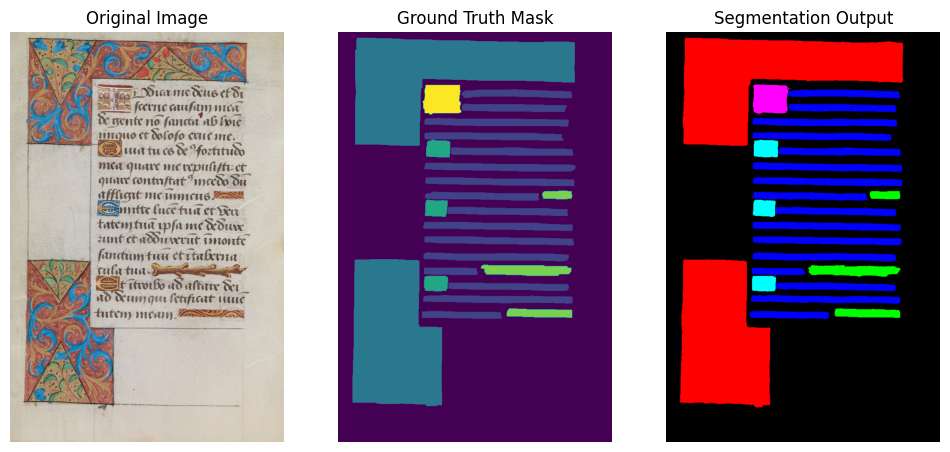

In [78]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 5

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [90]:
history2 = model2.fit(X_train, y_train_cat,
                    batch_size = 1,
                    verbose=1,
                    epochs=300,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb1e300rgbinputunet16.hdf5')

Epoch 1/300
80/80 [==============================] - 18s 69ms/step - loss: 2.2186 - accuracy: 0.7099 - val_loss: 0.4478 - val_accuracy: 0.8656
Epoch 2/300
80/80 [==============================] - 5s 62ms/step - loss: 0.4273 - accuracy: 0.8734 - val_loss: 0.4517 - val_accuracy: 0.8649
Epoch 3/300
80/80 [==============================] - 5s 62ms/step - loss: 0.3874 - accuracy: 0.8837 - val_loss: 0.9715 - val_accuracy: 0.8032
Epoch 4/300
80/80 [==============================] - 5s 62ms/step - loss: 0.5466 - accuracy: 0.8409 - val_loss: 0.3490 - val_accuracy: 0.9030
Epoch 5/300
80/80 [==============================] - 5s 62ms/step - loss: 0.2395 - accuracy: 0.9259 - val_loss: 0.2084 - val_accuracy: 0.9359
Epoch 6/300
80/80 [==============================] - 5s 63ms/step - loss: 0.1583 - accuracy: 0.9487 - val_loss: 0.1512 - val_accuracy: 0.9513
Epoch 7/300
80/80 [==============================] - 5s 62ms/step - loss: 0.3048 - accuracy: 0.9159 - val_loss: 0.6815 - val_accuracy: 0.7915
Epoch

In [91]:
y_pred=model2.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 0s 261ms/step
Mean IoU = 0.10982571
[[4048615.       0.       0.       0.       0.       0.]
 [ 734475.       0.       0.       0.       0.       0.]
 [1205605.       0.       0.       0.       0.       0.]
 [  60722.       0.       0.       0.       0.       0.]
 [  66578.       0.       0.       0.       0.       0.]
 [  28005.       0.       0.       0.       0.       0.]]
IoU for class 1 is: 0.6589542627334595
IoU for class 2 is: 0.0
IoU for class 3 is: 0.0
IoU for class 4 is: 0.0
IoU for class 5 is: 0.0
IoU for class 6 is: 0.0


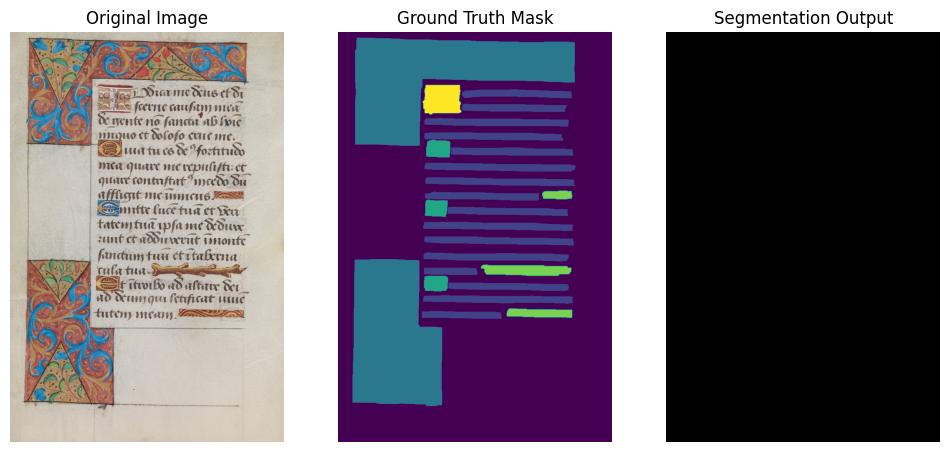

In [92]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 5

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [94]:
history2 = model2.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model.save('testb5e100rgbinputunet16.hdf5')

Epoch 1/100
16/16 [==============================] - 11s 299ms/step - loss: 7.8676 - accuracy: 0.5830 - val_loss: 1.1863 - val_accuracy: 0.7050
Epoch 2/100
16/16 [==============================] - 4s 264ms/step - loss: 0.8526 - accuracy: 0.7614 - val_loss: 0.5752 - val_accuracy: 0.8142
Epoch 3/100
16/16 [==============================] - 4s 265ms/step - loss: 0.5067 - accuracy: 0.8433 - val_loss: 0.4392 - val_accuracy: 0.8658
Epoch 4/100
16/16 [==============================] - 4s 266ms/step - loss: 0.3789 - accuracy: 0.8884 - val_loss: 0.4281 - val_accuracy: 0.8720
Epoch 5/100
16/16 [==============================] - 4s 265ms/step - loss: 0.3418 - accuracy: 0.8986 - val_loss: 0.3575 - val_accuracy: 0.8859
Epoch 6/100
16/16 [==============================] - 4s 268ms/step - loss: 0.2952 - accuracy: 0.9127 - val_loss: 0.3046 - val_accuracy: 0.9071
Epoch 7/100
16/16 [==============================] - 4s 264ms/step - loss: 0.2459 - accuracy: 0.9276 - val_loss: 0.2611 - val_accuracy: 0.923

In [95]:
y_pred=model2.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 0s 261ms/step
Mean IoU = 0.10982571
[[4048615.       0.       0.       0.       0.       0.]
 [ 734475.       0.       0.       0.       0.       0.]
 [1205605.       0.       0.       0.       0.       0.]
 [  60722.       0.       0.       0.       0.       0.]
 [  66578.       0.       0.       0.       0.       0.]
 [  28005.       0.       0.       0.       0.       0.]]
IoU for class 1 is: 0.6589542627334595
IoU for class 2 is: 0.0
IoU for class 3 is: 0.0
IoU for class 4 is: 0.0
IoU for class 5 is: 0.0
IoU for class 6 is: 0.0


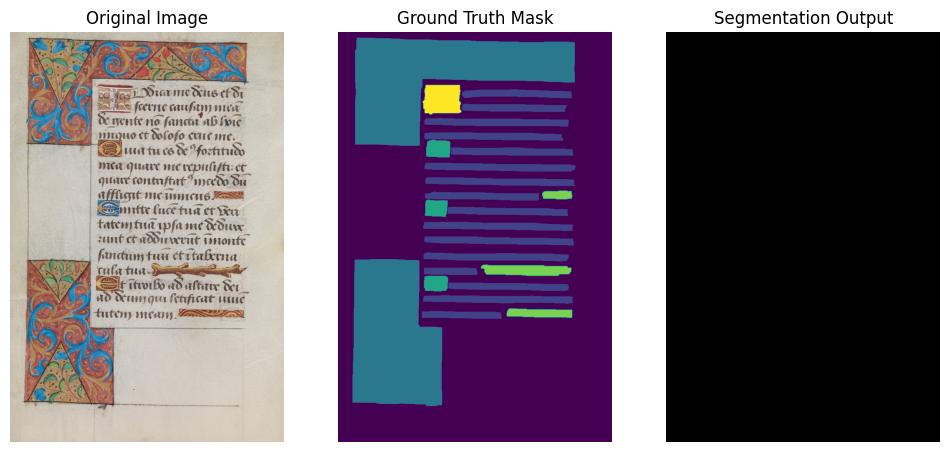

In [96]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 5

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [97]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate

def encoder_decoder_cnn(n_classes=6, IMG_HEIGHT=960, IMG_WIDTH=640, IMG_CHANNELS=1):
    #Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Decoder
    u4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = Conv2D(n_classes, (1), activation='softmax')(c5)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [107]:
def get_model():
    return encoder_decoder_cnn(n_classes=6, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model3 = get_model()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 960, 640, 3)]        0         []                            
                                                                                                  
 conv2d_163 (Conv2D)         (None, 960, 640, 32)         896       ['input_10[0][0]']            
                                                                                                  
 conv2d_164 (Conv2D)         (None, 960, 640, 32)         9248      ['conv2d_163[0][0]']          
                                                                                                  
 max_pooling2d_35 (MaxPooli  (None, 480, 320, 32)         0         ['conv2d_164[0][0]']          
 ng2D)                                                                                      

In [104]:
history2 = model3.fit(X_train, y_train_cat,
                    batch_size = 5,
                    verbose=1,
                    epochs=60,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model3.save('testb5e60rgbinputcnn.hdf5')

Epoch 1/60
16/16 [==============================] - 13s 133ms/step - loss: 4.3479 - accuracy: 0.5733 - val_loss: 1.0193 - val_accuracy: 0.6955
Epoch 2/60
16/16 [==============================] - 2s 109ms/step - loss: 0.7591 - accuracy: 0.7634 - val_loss: 0.5719 - val_accuracy: 0.8226
Epoch 3/60
16/16 [==============================] - 2s 108ms/step - loss: 0.4799 - accuracy: 0.8632 - val_loss: 0.4226 - val_accuracy: 0.8769
Epoch 4/60
16/16 [==============================] - 2s 110ms/step - loss: 0.3275 - accuracy: 0.9091 - val_loss: 0.3230 - val_accuracy: 0.9181
Epoch 5/60
16/16 [==============================] - 2s 107ms/step - loss: 0.2459 - accuracy: 0.9324 - val_loss: 0.2326 - val_accuracy: 0.9354
Epoch 6/60
16/16 [==============================] - 2s 108ms/step - loss: 0.1922 - accuracy: 0.9442 - val_loss: 0.2095 - val_accuracy: 0.9367
Epoch 7/60
16/16 [==============================] - 2s 108ms/step - loss: 0.2374 - accuracy: 0.9324 - val_loss: 0.3126 - val_accuracy: 0.9091
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [105]:
y_pred=model3.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 4s 4s/step
Mean IoU = 0.9034729
[[4.020637e+06 2.137700e+04 2.754000e+03 1.550000e+03 1.514000e+03
  7.830000e+02]
 [1.710500e+04 7.171190e+05 2.340000e+02 0.000000e+00 0.000000e+00
  1.700000e+01]
 [7.486000e+03 0.000000e+00 1.197332e+06 6.900000e+01 1.980000e+02
  5.200000e+02]
 [1.977000e+03 2.000000e+00 9.520000e+02 5.361200e+04 1.610000e+02
  4.018000e+03]
 [2.374000e+03 0.000000e+00 2.340000e+02 7.300000e+01 6.388300e+04
  1.400000e+01]
 [1.152000e+03 1.100000e+01 3.111000e+03 9.400000e+01 9.000000e+00
  2.362800e+04]]
IoU for class 1 is: 0.9857621788978577
IoU for class 2 is: 0.9487395286560059
IoU for class 3 is: 0.9871727824211121
IoU for class 4 is: 0.8576822280883789
IoU for class 5 is: 0.9331434369087219
IoU for class 6 is: 0.7083370685577393


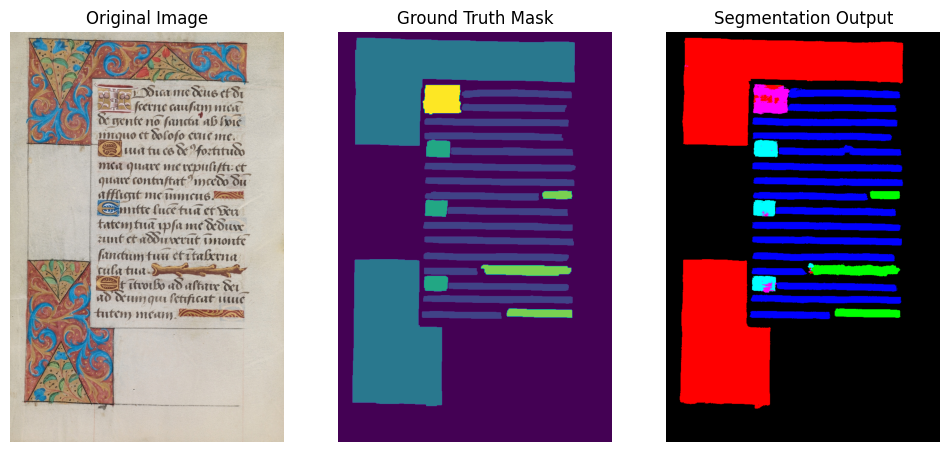

In [106]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 5

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()

In [108]:
history2 = model3.fit(X_train, y_train_cat,
                    batch_size = 4,
                    verbose=1,
                    epochs=80,
                    validation_data=(X_val, y_val_cat),
                    #class_weight=class_weights,
                    shuffle=False)

model3.save('testb4e80rgbinputcnn.hdf5')

Epoch 1/80
20/20 [==============================] - 13s 187ms/step - loss: 3.2987 - accuracy: 0.5878 - val_loss: 0.8606 - val_accuracy: 0.7709
Epoch 2/80
20/20 [==============================] - 2s 89ms/step - loss: 0.6647 - accuracy: 0.7938 - val_loss: 0.5363 - val_accuracy: 0.8231
Epoch 3/80
20/20 [==============================] - 2s 88ms/step - loss: 0.4551 - accuracy: 0.8542 - val_loss: 0.4321 - val_accuracy: 0.8630
Epoch 4/80
20/20 [==============================] - 2s 89ms/step - loss: 0.3595 - accuracy: 0.8935 - val_loss: 0.3168 - val_accuracy: 0.9197
Epoch 5/80
20/20 [==============================] - 2s 88ms/step - loss: 0.2691 - accuracy: 0.9256 - val_loss: 0.2605 - val_accuracy: 0.9315
Epoch 6/80
20/20 [==============================] - 2s 87ms/step - loss: 0.2396 - accuracy: 0.9332 - val_loss: 0.2327 - val_accuracy: 0.9360
Epoch 7/80
20/20 [==============================] - 2s 87ms/step - loss: 0.1957 - accuracy: 0.9462 - val_loss: 0.1936 - val_accuracy: 0.9447
Epoch 8/80


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
y_pred=model3.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


from keras.metrics import MeanIoU

# Assuming n_classes = 4 for 4 classes
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)

# Update state with ground truth and predictions
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
mean_iou = IOU_keras.result().numpy()
print("Mean IoU =", mean_iou)

# To calculate IoU for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculate IoU for each class individually
class_iou = []
for i in range(n_classes):
    numerator = values[i, i]
    denominator = np.sum(values[i, :]) + np.sum(values[:, i]) - numerator
    class_iou.append(numerator / denominator)

# Print IoU for each class
for i in range(n_classes):
    print(f"IoU for class {i+1} is: {class_iou[i]}")

1/1 [==============================] - 0s 170ms/step
Mean IoU = 0.9026358
[[4.021843e+06 1.774200e+04 2.734000e+03 2.061000e+03 2.499000e+03
  1.736000e+03]
 [2.097500e+04 7.134030e+05 2.900000e+01 9.000000e+00 1.000000e+00
  5.800000e+01]
 [7.963000e+03 0.000000e+00 1.192216e+06 2.471000e+03 3.110000e+02
  2.644000e+03]
 [1.133000e+03 5.000000e+00 5.900000e+01 5.602400e+04 8.800000e+01
  3.413000e+03]
 [1.453000e+03 1.300000e+01 1.720000e+02 4.300000e+01 6.487900e+04
  1.800000e+01]
 [7.550000e+02 2.000000e+01 1.697000e+03 1.530000e+02 7.000000e+00
  2.537300e+04]]
IoU for class 1 is: 0.985529899597168
IoU for class 2 is: 0.9483526349067688
IoU for class 3 is: 0.985061526298523
IoU for class 4 is: 0.8558639883995056
IoU for class 5 is: 0.9337257742881775
IoU for class 6 is: 0.7072810530662537


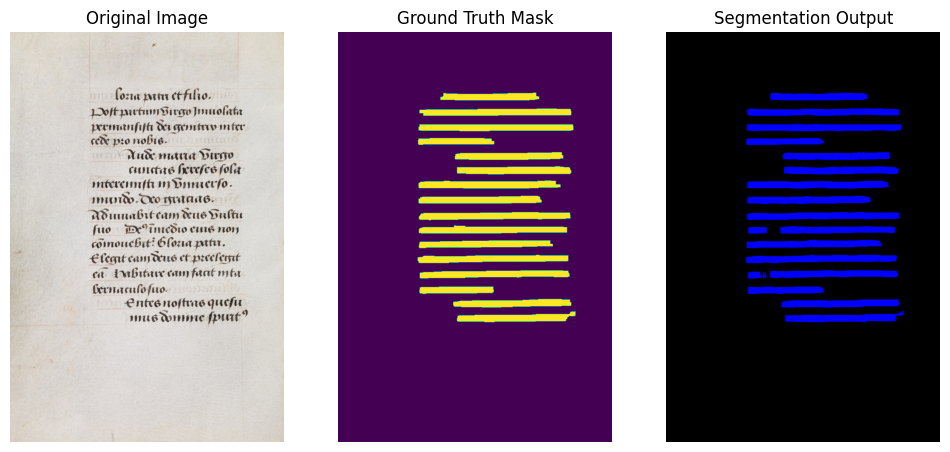

In [110]:
import numpy as np
import matplotlib.pyplot as plt


image_index = 7

# Extract the original image, ground truth mask, and predicted mask for the chosen index
original_image = X_test[image_index]  # Assuming X_test is a numpy array of images
ground_truth_mask = y_test[image_index]  # Assuming y_test is a numpy array of ground truth masks (RGB)
predicted_mask = y_pred[image_index]

output = (predicted_mask)  # Assuming there are 6 classes and output is one-hot encoded

# Convert one-hot encoded output to label encoded
label_encoded_output = np.argmax(output, axis=-1)

# Define the color map (one color per class)
colors = [
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 0],    # Red
    [0, 255, 255],  # Cyan
    [0, 255, 0],    # Green
    [255, 0, 255],  # Magenta
]

# Create an empty array for the RGB image
height, width = label_encoded_output.shape
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

# Map class indices to colors
for i, color in enumerate(colors):
    mask = (label_encoded_output == i)
    rgb_image[mask] = color

 # Assuming y_pred is a numpy array of predicted masks (RGB)

# Plot the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask)
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_image)
plt.title("Segmentation Output")
plt.axis('off')
plt.show()